![](https://www.rocketmortgage.com/resources-cmsassets/RocketMortgage.com/Article_Images/Large_Images/Stock-Modern-House-With-Large-Pool-AdobeStock-127770833-Copy.jpg)

# 1. Importation des modules

In [62]:
from myfunctions import *
import numpy as np
import pandas as pd
import missingno as msno

from scipy.stats import kurtosis, skew

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

# 2. Importation de la base et première analyse

In [63]:
df = pd.read_csv("../data/AmesHousing.csv")

In [64]:
df.shape

(2930, 82)

In [65]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

# 3. Missing Data

<Axes: >

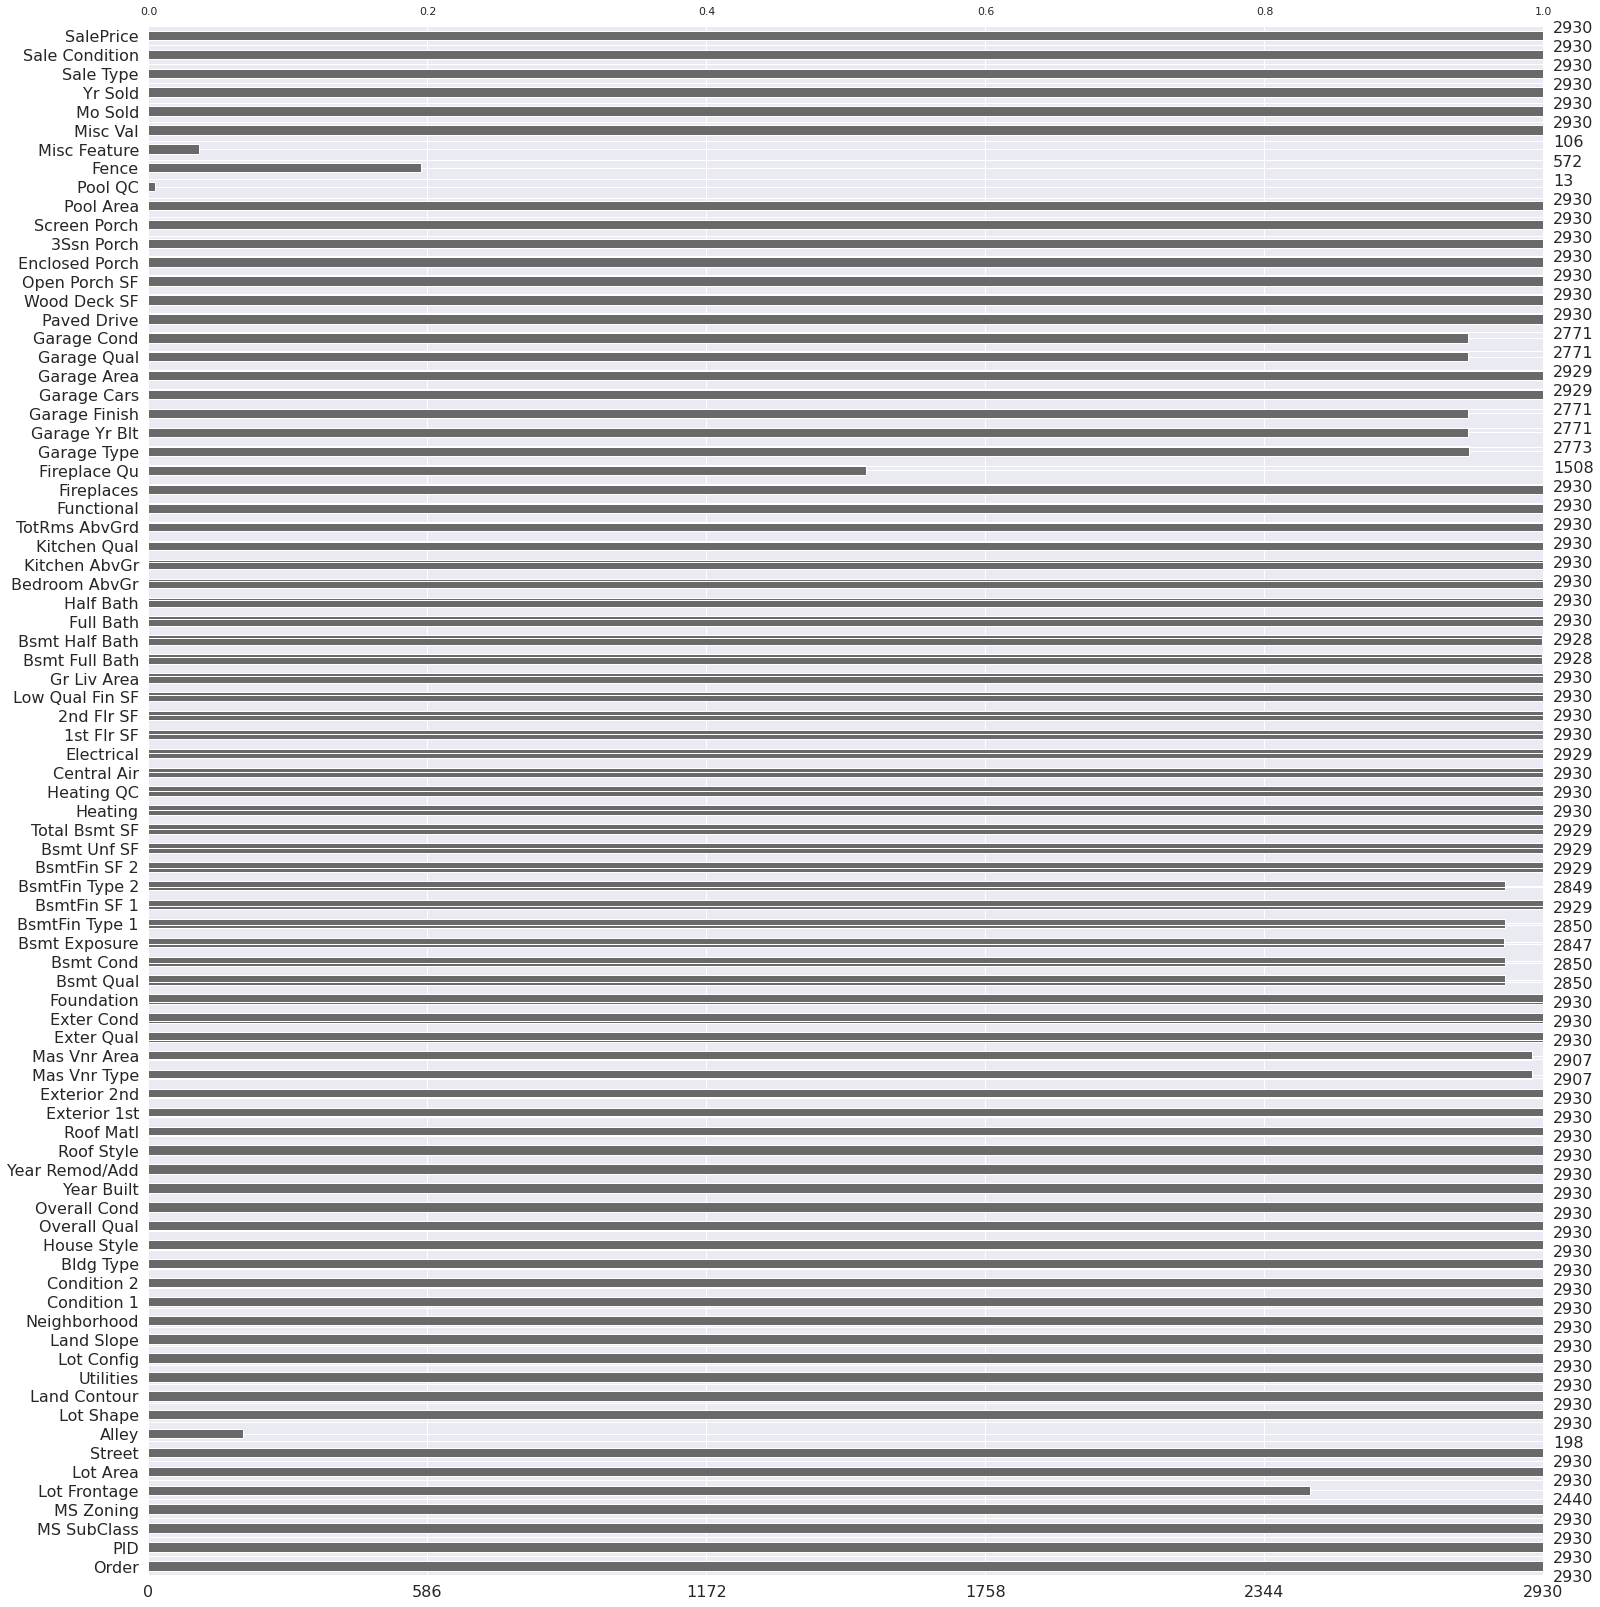

In [66]:
msno.bar(df)

<Axes: >

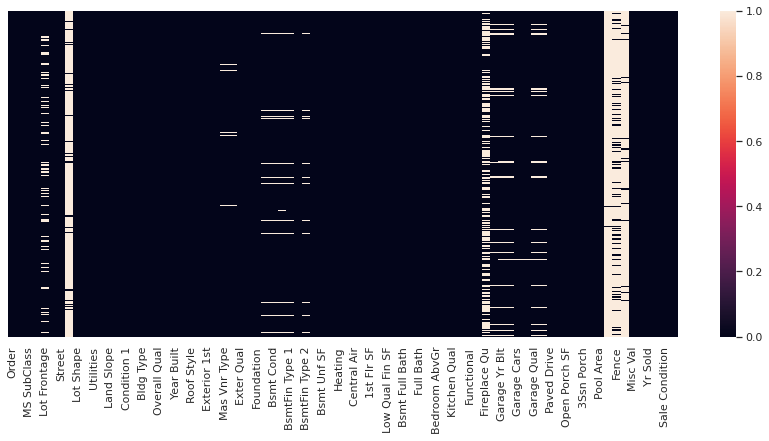

In [67]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.isnull(),yticklabels=False)

In [68]:
df.isna().sum().sort_values(ascending=False).head(30)

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Finish      159
Garage Yr Blt      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Mas Vnr Type        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
Garage Cars          1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Garage Area          1
Paved Drive          0
Full Bath            0
Half Bath            0
dtype: int64

In [69]:
missing_values_summary(df).head(30)

Missing Count  Percentage Missing %
Pool QC                  2917             99.556314
Misc Feature             2824             96.382253
Alley                    2732             93.242321
Fence                    2358             80.477816
Fireplace Qu             1422             48.532423
Lot Frontage              490             16.723549
Garage Cond               159              5.426621
Garage Finish             159              5.426621
Garage Yr Blt             159              5.426621
Garage Qual               159              5.426621
Garage Type               157              5.358362
Bsmt Exposure              83              2.832765
BsmtFin Type 2             81              2.764505
Bsmt Qual                  80              2.730375
Bsmt Cond                  80              2.730375
BsmtFin Type 1             80              2.730375
Mas Vnr Area               23              0.784983
Mas Vnr Type               23              0.784983
Bsmt Full Bath              2              0.068259
Bsmt Half Bath              2              0.068259
BsmtFin SF 1                1              0.034130
Garage Cars                 1              0.034130
Electrical                  1              0.034130
Total Bsmt SF               1              0.034130
Bsmt Unf SF                 1              0.034130
BsmtFin SF 2                1              0.034130
Garage Area                 1              0.034130
Paved Drive                 0              0.000000
Full Bath                   0              0.000000
Half Bath                   0              0.000000

On supprime les colonnes inutiles ou avec trop de valeurs nulles

In [70]:
df = df.drop(["Order","PID","Alley","Fireplace Qu","Pool QC","Fence","Misc Feature"], axis=1)

In [71]:
df.shape

(2930, 75)

In [72]:
y = df["SalePrice"]
X = df.drop(["SalePrice"], axis =1)

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creation de nouvelles Variables

#### Age = YrSold - YearBuilt

In [74]:
df['Age'] = df['Yr Sold'] - df['Year Built']


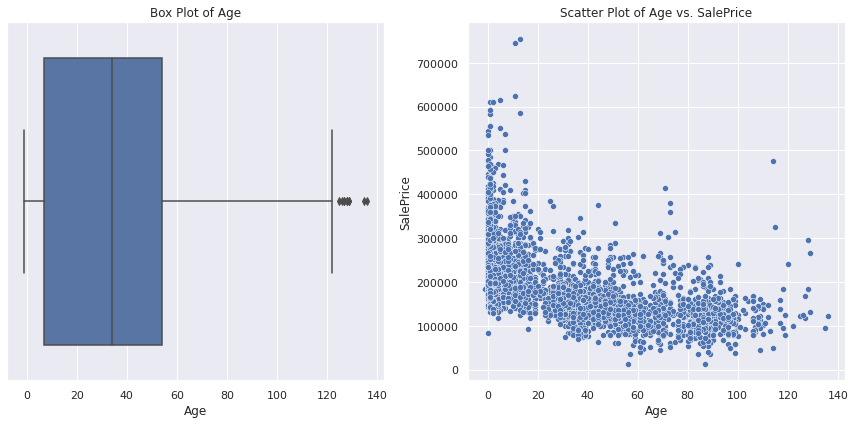

In [75]:
plot_box_and_scatter(df, 'Age')

#### GarageAge = YrSold - GarageYrBlt

In [76]:
df['GarageAge'] = df['Yr Sold'] - df['Garage Yr Blt']

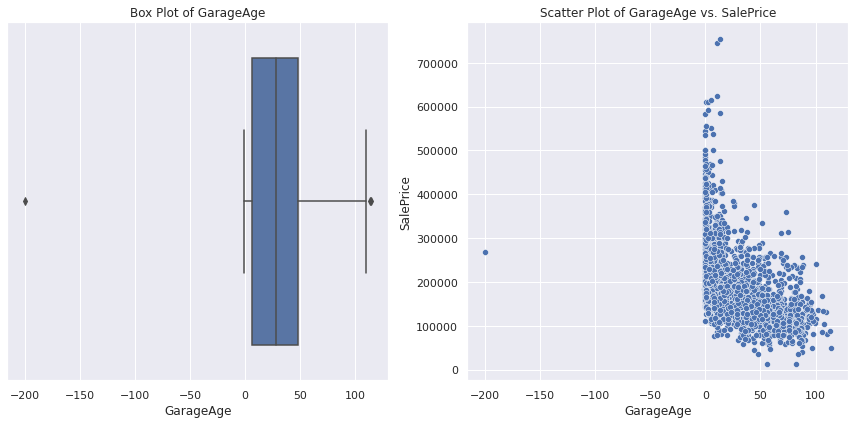

In [77]:
plot_box_and_scatter(df, 'GarageAge')

#### TotalSF = TotalBsmtSF + GrLivArea + 1stFlrSF + 2ndFlrSF

In [78]:
df['TotalSF'] = df['Total Bsmt SF'] + df['Gr Liv Area'] + df['1st Flr SF'] + df['2nd Flr SF']

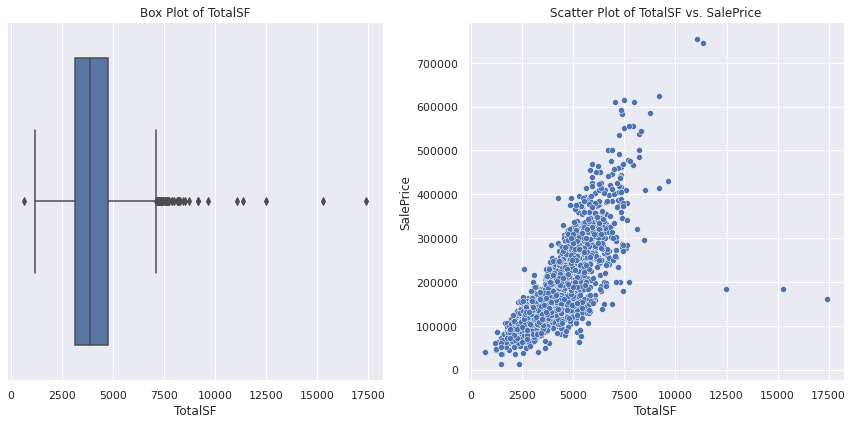

In [79]:
plot_box_and_scatter(df, 'TotalSF')

#### TotalBathrooms = FullBath + HalfBath

In [80]:
df['TotalBathrooms'] = df['Full Bath'] + 0.5*df['Half Bath']

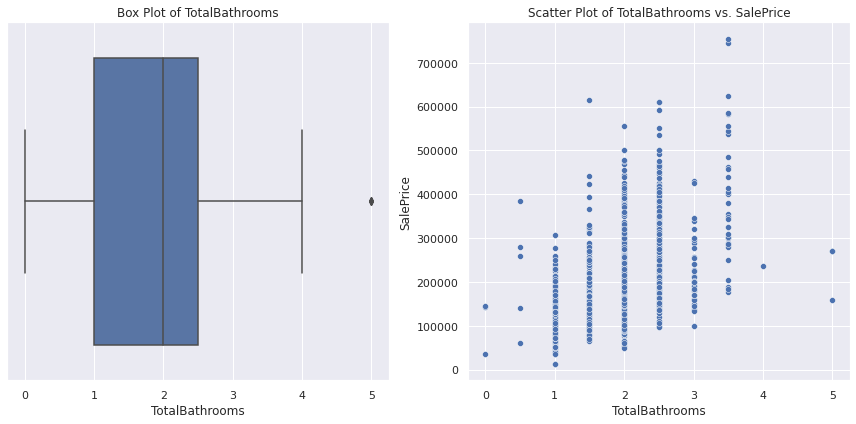

In [81]:
plot_box_and_scatter(df, 'TotalBathrooms')

#### TotalPorchSF = OpenPorchSF + EnclosedPorch + 3SsnPorch + ScreenPorch

In [82]:
df['TotalPorchSF'] = df['Open Porch SF'] + df['Enclosed Porch'] + df['3Ssn Porch'] + df['Screen Porch']

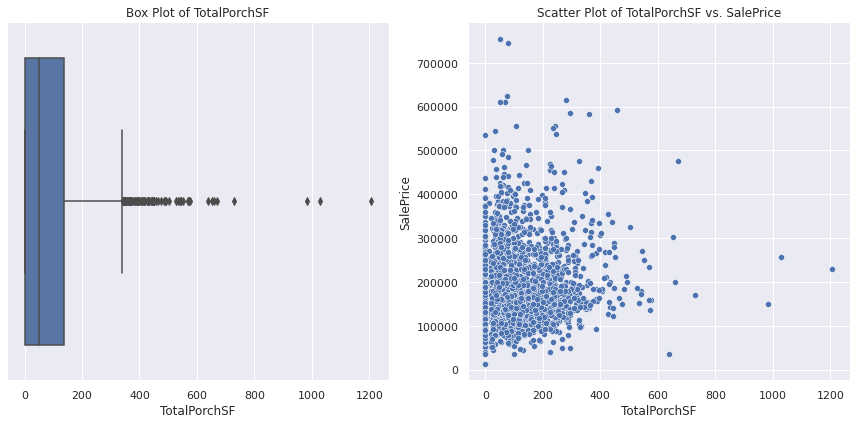

In [83]:
plot_box_and_scatter(df, 'TotalPorchSF')

#### TotalOutdoorSF = TotalPorchSF + WoodDeckSF + PoolArea

In [84]:
df['TotalOutdoorSF'] = df['TotalPorchSF'] + df['Wood Deck SF'] + df['Pool Area']

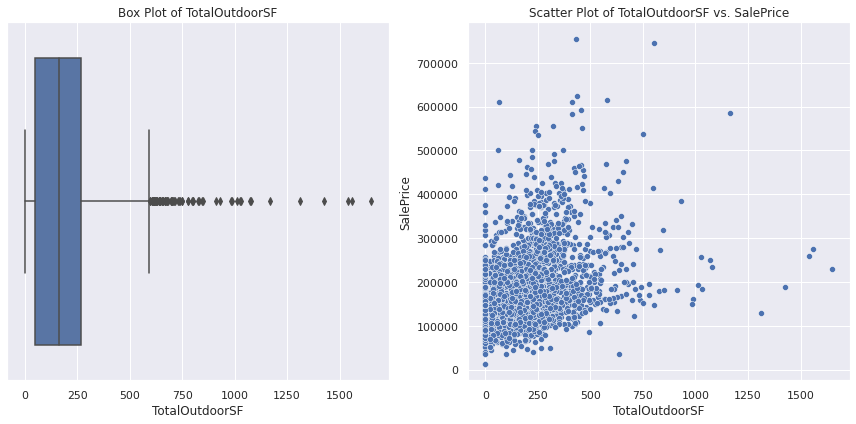

In [85]:
plot_box_and_scatter(df, 'TotalOutdoorSF')

#### Trouver les variable numériques et catégocrielles

In [86]:
# Get numeric variables (int64 and float64)
num_col = df.select_dtypes(include=['int64', 'float64'])

# Get categorical variables (object data type)
cat_col = df.select_dtypes(include=['object'])

print(f"num_col shap : {num_col.shape}")
print(f"num_col columns : {num_col.columns}")
print(f"cat_col shap : {cat_col.shape}")
print(f"cat_col columns : {cat_col.columns}")

num_col shap : (2930, 43)
num_col columns : Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice', 'Age',
       'GarageAge', 'TotalSF', 'TotalBathrooms', 'TotalPorchSF',
       'TotalOutdoorSF'],
      dtype='object')
cat_col shap : (2930, 38)
cat_col columns : Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg

# 4. Analyse de données

### SalePrice Distribution

In [87]:
prices = pd.DataFrame({"log(price)":np.log1p(df["SalePrice"]), "price":df["SalePrice"]})


/tmp/ipykernel_13747/2390060031.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prices['price'], ax=axes[0], label='Price', hist_kws={'alpha': 0.5})
/tmp/ipykernel_13747/2390060031.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prices['log(price)'], ax=axes[1], label='Log(Price)', his

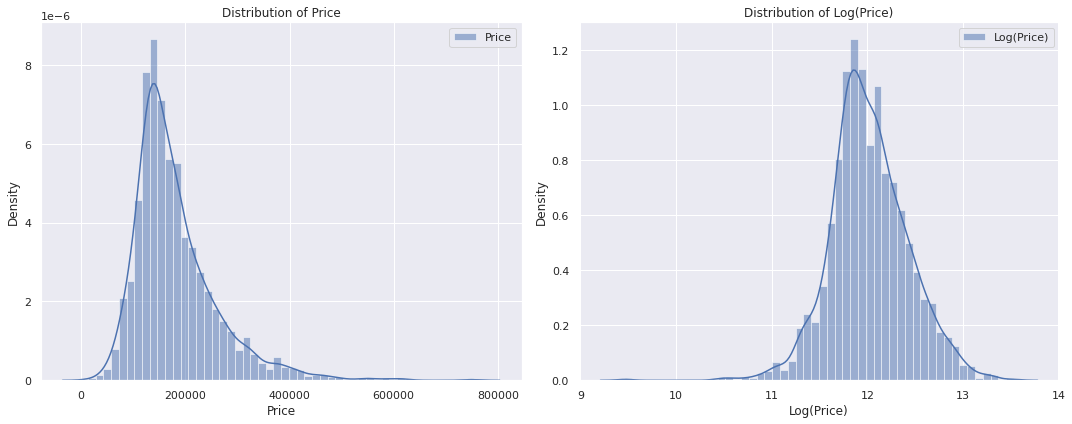

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have imported the necessary libraries and have your DataFrame 'prices' available.

# Create a new figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the histogram for 'price'
sns.distplot(prices['price'], ax=axes[0], label='Price', hist_kws={'alpha': 0.5})
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Density')
axes[0].set_title('Distribution of Price')
axes[0].legend()

# Plot the histogram for 'log(price + 1)'
sns.distplot(prices['log(price)'], ax=axes[1], label='Log(Price)', hist_kws={'alpha': 0.5})
axes[1].set_xlabel('Log(Price)')
axes[1].set_ylabel('Density')
axes[1].set_title('Distribution of Log(Price)')
axes[1].legend()

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()


/tmp/ipykernel_13747/4183434237.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prices['price'], ax=axes[0], label='SalePrice', hist_kws={'alpha': 0.5})
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


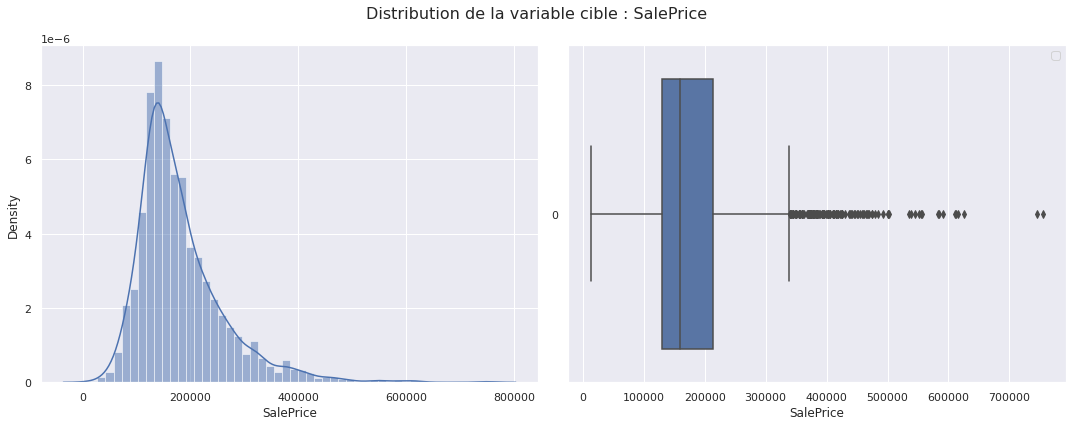

In [89]:

# Create a new figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the histogram for 'price'
sns.distplot(prices['price'], ax=axes[0], label='SalePrice', hist_kws={'alpha': 0.5})
axes[0].set_xlabel('SalePrice')
axes[0].set_ylabel('Density')

# Plot the histogram for 'log(price + 1)'
sns.boxplot(prices['price'], orient = "h")
axes[1].set_xlabel('SalePrice')
axes[1].legend()

# Add a title to the figure
fig.suptitle("Distribution de la variable cible : SalePrice", fontsize=16)

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()


### Describe + Kurtosis + Skewness

In [90]:
extended_describe_all_columns(prices)

log(price)          price
count     2930.000000    2930.000000
mean        12.020975  180796.060068
std          0.407584   79886.692357
min          9.456419   12789.000000
25%         11.771444  129500.000000
50%         11.982935  160000.000000
75%         12.271397  213500.000000
max         13.534474  755000.000000
kurtosis     1.509189       5.108122
skewness    -0.014765       1.742607

### Les valeurs aberrantes

##### Univariate analysis

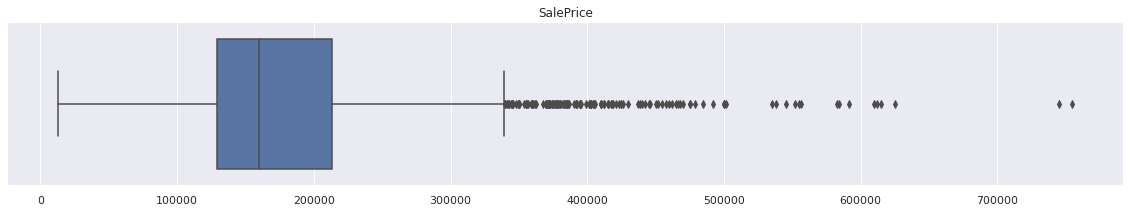

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créez une figure avec une taille personnalisée
plt.figure(figsize=(20, 3))

# Tracer le boxplot pour la variable 'SalePrice'
sns.boxplot(df['SalePrice'], orient="h")

# Supprimer l'étiquette de l'axe Y
plt.yticks([])
plt.title("SalePrice")

# Afficher le graphique
plt.show()


In [92]:
# Convertir la variable 'SalePrice' en type numérique (int ou float)
df['SalePrice'] = df['SalePrice'].astype(float) 



low_range, high_range = get_extreme_values(df, 'SalePrice', threshold=10)
print(f'Valeurs extrêmes (basses) :\n {(low_range)}')
print(f'Ecart-type : {round(np.std(low_range),2)}')
print()
print(f'\nValeurs extrêmes (hautes) :\n {(high_range)}')
print(f'Ecart-type : {round(np.std(high_range),2)}')
print()

Valeurs extrêmes (basses) :
 [-2.1  -2.1  -1.83 -1.83 -1.82 -1.79 -1.77 -1.76 -1.71 -1.7 ]
Ecart-type : 0.14


Valeurs extrêmes (hautes) :
 [4.7  5.03 5.05 5.14 5.37 5.39 5.44 5.56 7.06 7.19]
Ecart-type : 0.8



##### Bivariate analysis

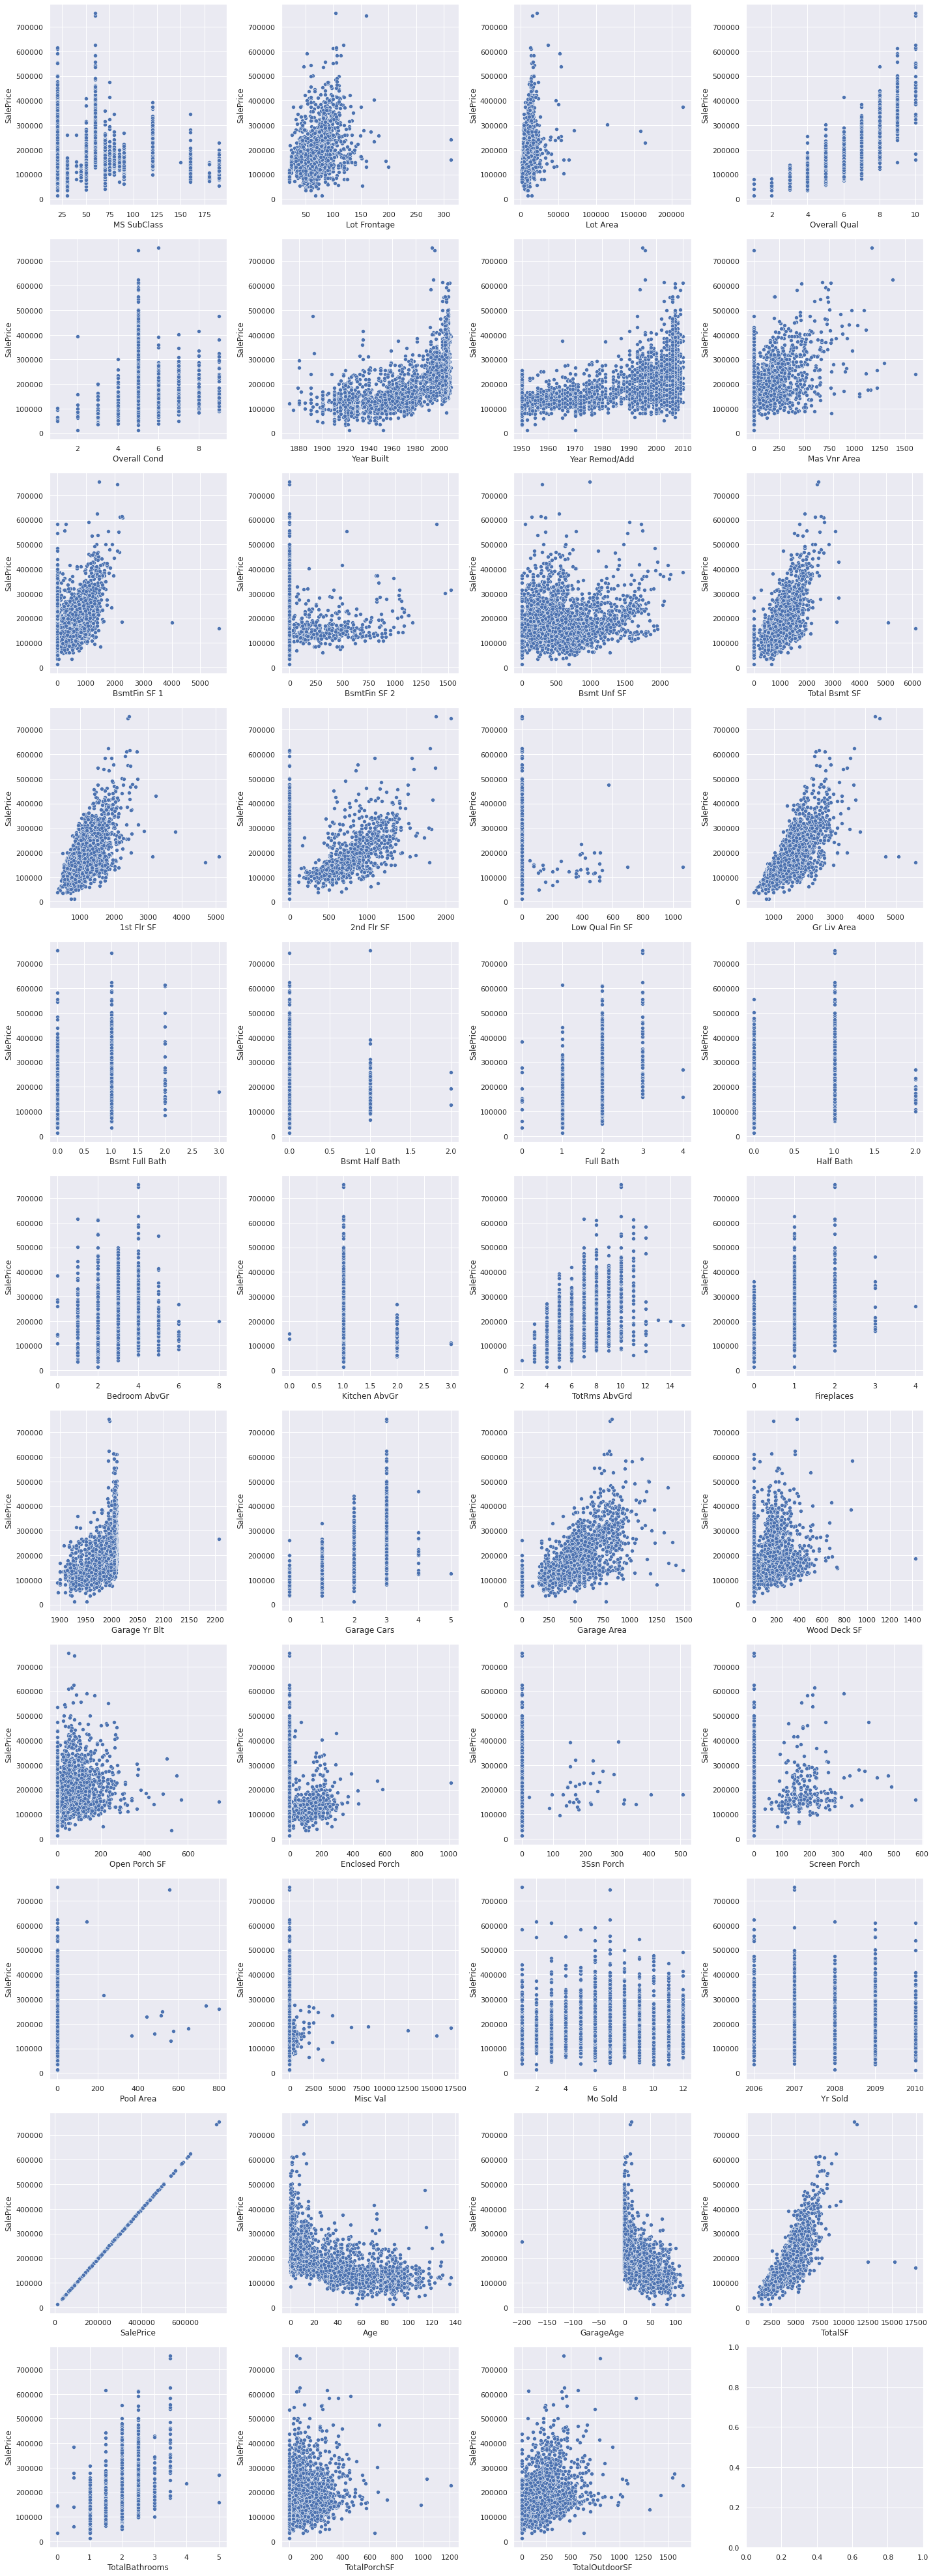

In [93]:

plot_scatter_with_saleprice(num_col)

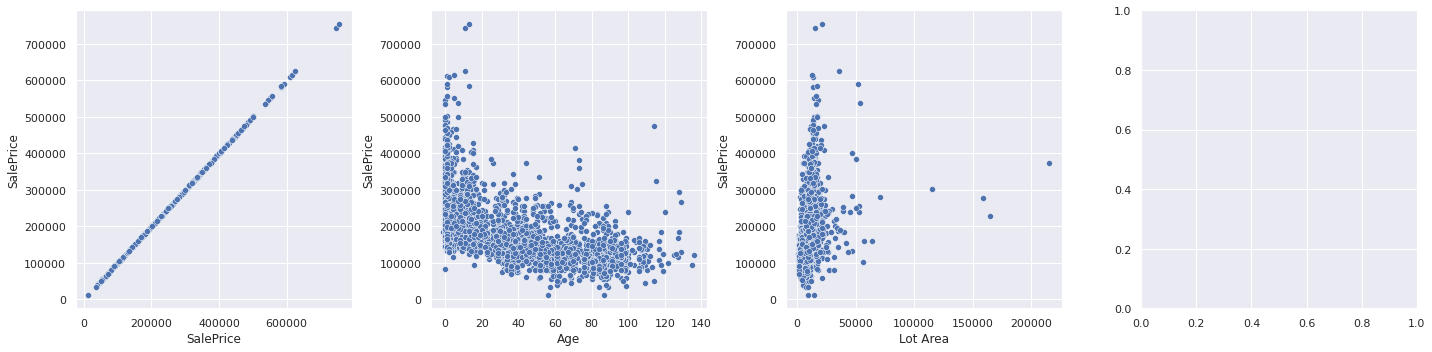

In [94]:
test = ['SalePrice', 'Age', 'Lot Area']

plot_scatter_with_saleprice(df[test])

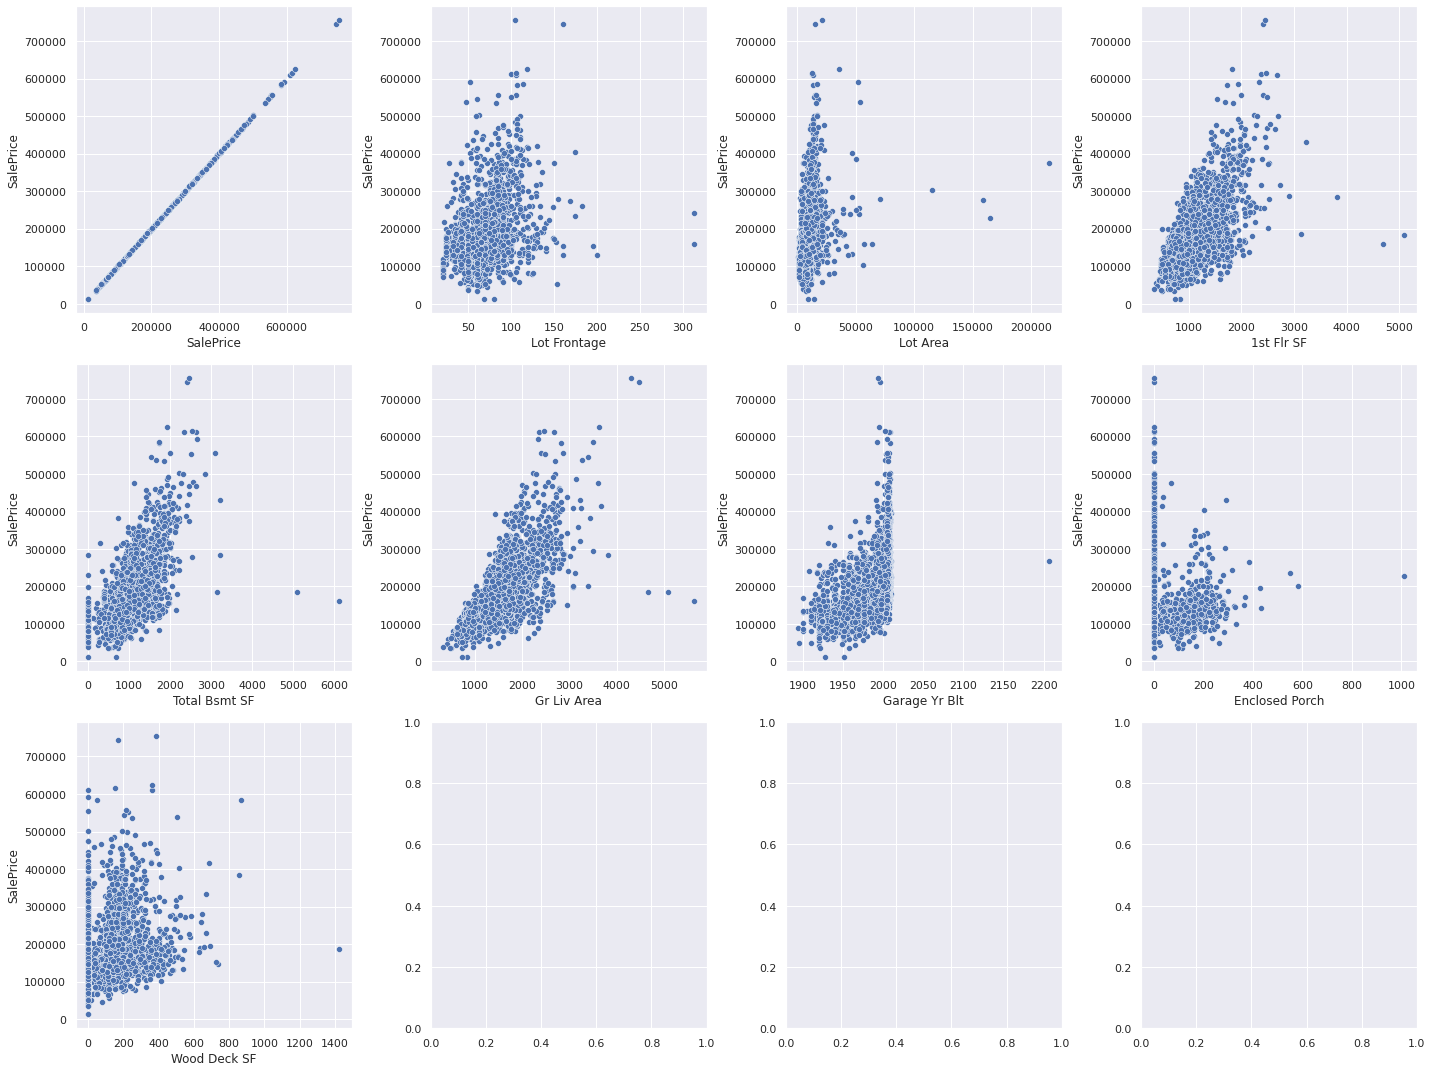

In [95]:
num_col_for_outliers = ['SalePrice', 'Lot Frontage', 'Lot Area', '1st Flr SF', 'Total Bsmt SF', 'Gr Liv Area', 'Garage Yr Blt', 'Enclosed Porch', 'Wood Deck SF']

plot_scatter_with_saleprice(df[num_col_for_outliers])

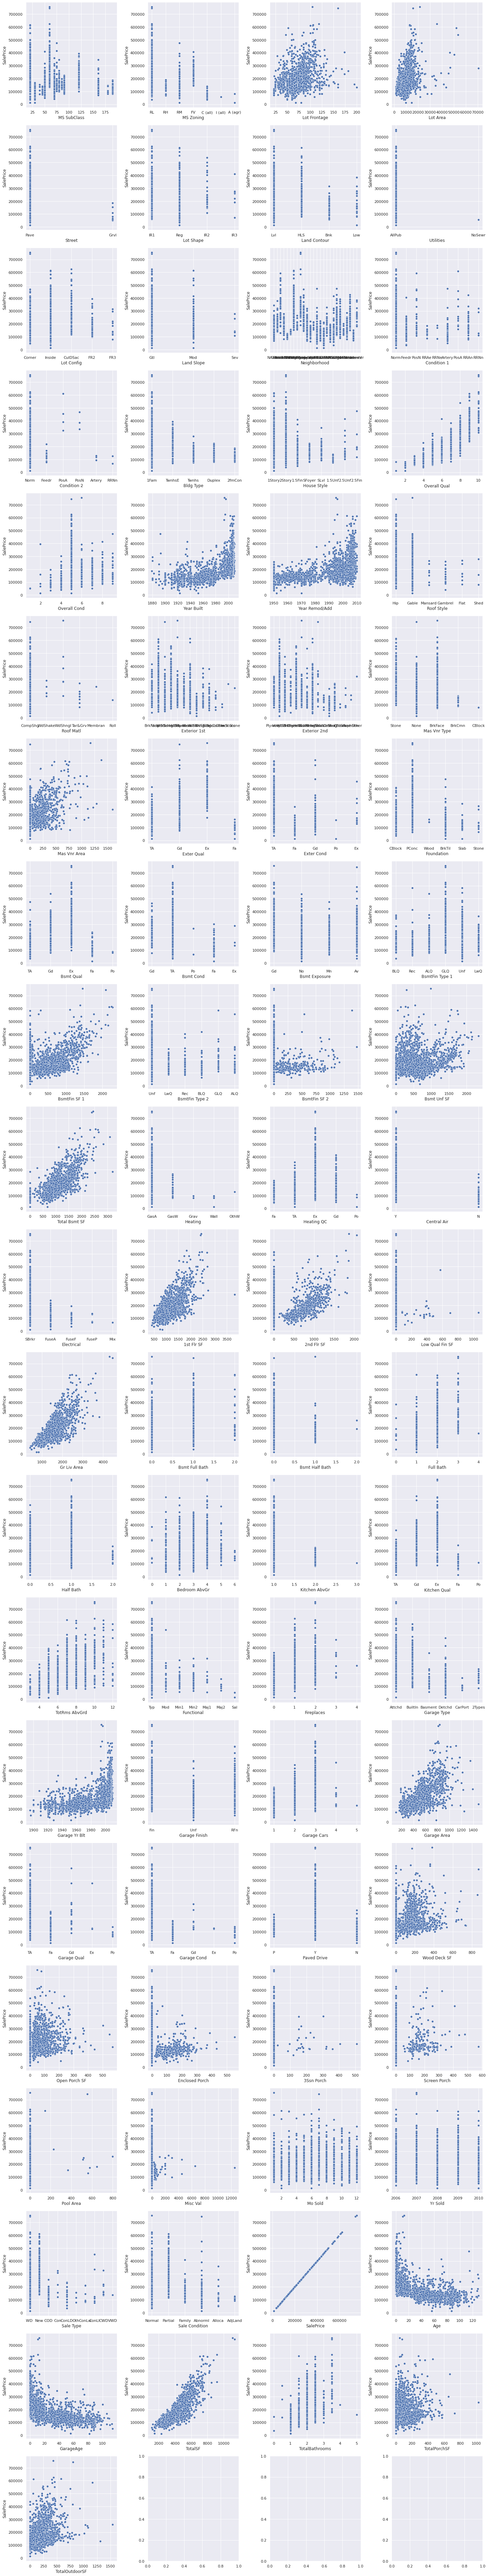

In [96]:
# Removing rows where "Lot Frontage" is greater than 250
df = df[df["Lot Frontage"] <= 300]
df = df[df["Lot Area"] <= 150000]
df = df[df["1st Flr SF"] <= 4000]
df = df[df["Gr Liv Area"] <= 4500]
df = df[df["Garage Yr Blt"] <= 2200]
df = df[df["Enclosed Porch"] <= 1000]
df = df[df["GarageAge"] >= 0]

plot_scatter_with_saleprice(df)

# La polynomialisation

Nous allons générer les termes quadratiques pour Lot Area, Age et TotalSF, car d'après les scatterplots, la relation avec SalePrice semble être non linéaire.

In [97]:
df['QuadLotArea'] = df['Lot Area']**2
df['QuadAge'] = df['Age']**2
df['TotalSF'] = df['TotalSF']**2

#### Trouver les variables Quantitatives et Qualitatives

In [98]:

# Get numeric variables (int64 and float64)
num_col = df.select_dtypes(include=['int64', 'float64'])

# Get categorical variables (object data type)
cat_col = df.select_dtypes(include=['object'])

In [99]:
print(num_col.shape)
print(num_col.columns)

(2285, 45)
Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice', 'Age',
       'GarageAge', 'TotalSF', 'TotalBathrooms', 'TotalPorchSF',
       'TotalOutdoorSF', 'QuadLotArea', 'QuadAge'],
      dtype='object')


In [100]:
print(cat_col.shape)
print(cat_col.columns)

(2285, 38)
Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type', 'Sale Condition'],
      dtype='object')


# 5. Analyse des variables quantitatives

#### Numeriques columns sans les colonnes avec une valeur unique

array([[<Axes: title={'center': 'MS SubClass'}>,
        <Axes: title={'center': 'Lot Frontage'}>,
        <Axes: title={'center': 'Lot Area'}>,
        <Axes: title={'center': 'Overall Qual'}>,
        <Axes: title={'center': 'Overall Cond'}>,
        <Axes: title={'center': 'Year Built'}>,
        <Axes: title={'center': 'Year Remod/Add'}>],
       [<Axes: title={'center': 'Mas Vnr Area'}>,
        <Axes: title={'center': 'BsmtFin SF 1'}>,
        <Axes: title={'center': 'BsmtFin SF 2'}>,
        <Axes: title={'center': 'Bsmt Unf SF'}>,
        <Axes: title={'center': 'Total Bsmt SF'}>,
        <Axes: title={'center': '1st Flr SF'}>,
        <Axes: title={'center': '2nd Flr SF'}>],
       [<Axes: title={'center': 'Low Qual Fin SF'}>,
        <Axes: title={'center': 'Gr Liv Area'}>,
        <Axes: title={'center': 'Bsmt Full Bath'}>,
        <Axes: title={'center': 'Bsmt Half Bath'}>,
        <Axes: title={'center': 'Full Bath'}>,
        <Axes: title={'center': 'Half Bath'}>,
       

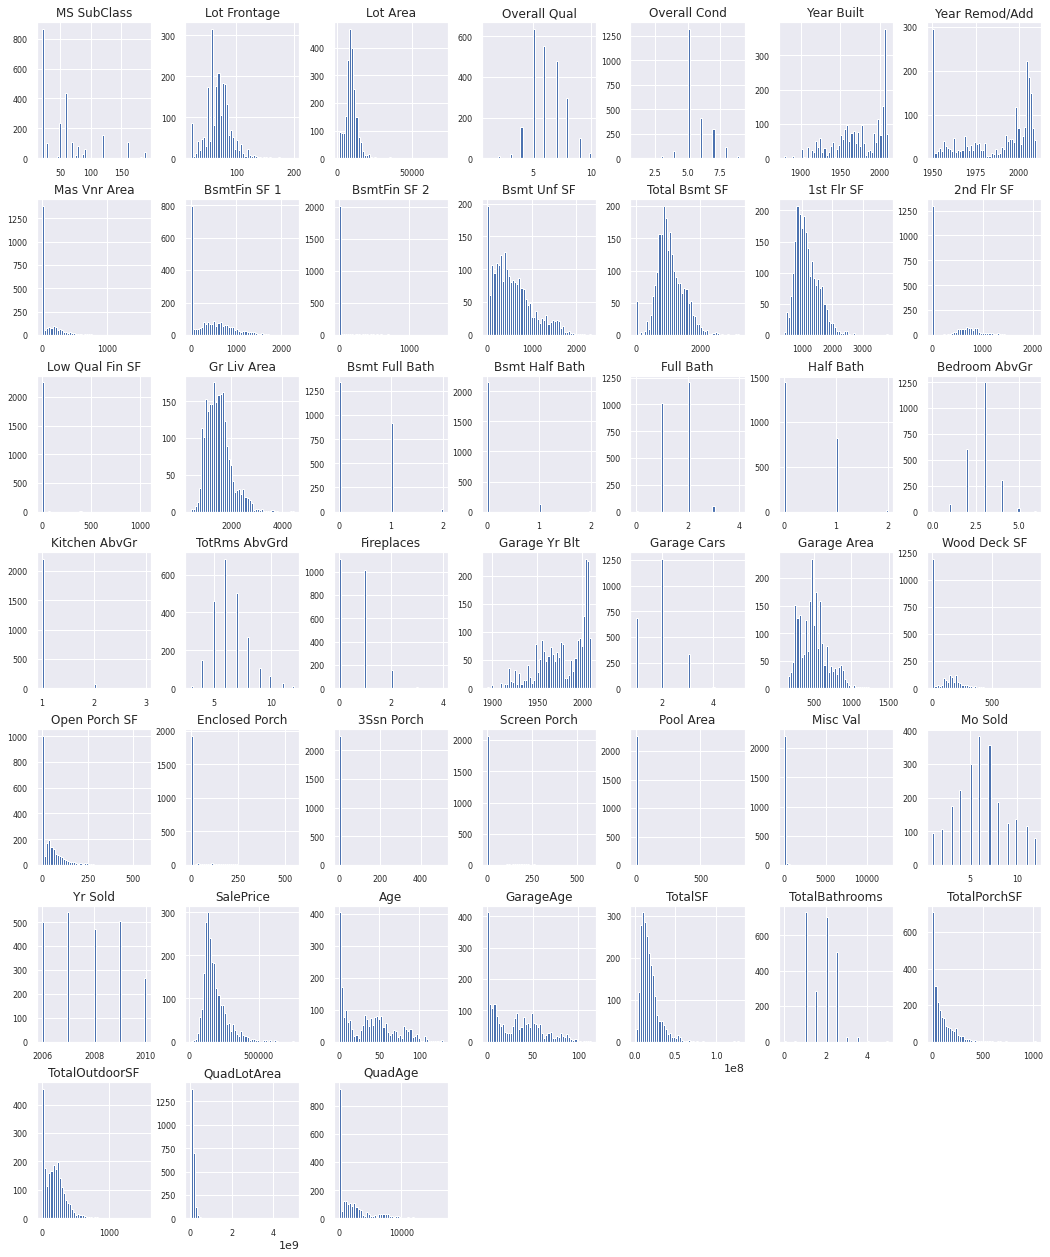

In [101]:
num_col.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

On supprimer les colonnes avec une valeur unique

In [102]:
to_drop = [ 'BsmtFin SF 2','Low Qual Fin SF', 'Open Porch SF','Screen Porch',
        'Pool Area', 'Misc Val', "3Ssn Porch"]

In [103]:
num_col= num_col.drop(to_drop,axis=1)


array([[<Axes: title={'center': 'MS SubClass'}>,
        <Axes: title={'center': 'Lot Frontage'}>,
        <Axes: title={'center': 'Lot Area'}>,
        <Axes: title={'center': 'Overall Qual'}>,
        <Axes: title={'center': 'Overall Cond'}>,
        <Axes: title={'center': 'Year Built'}>],
       [<Axes: title={'center': 'Year Remod/Add'}>,
        <Axes: title={'center': 'Mas Vnr Area'}>,
        <Axes: title={'center': 'BsmtFin SF 1'}>,
        <Axes: title={'center': 'Bsmt Unf SF'}>,
        <Axes: title={'center': 'Total Bsmt SF'}>,
        <Axes: title={'center': '1st Flr SF'}>],
       [<Axes: title={'center': '2nd Flr SF'}>,
        <Axes: title={'center': 'Gr Liv Area'}>,
        <Axes: title={'center': 'Bsmt Full Bath'}>,
        <Axes: title={'center': 'Bsmt Half Bath'}>,
        <Axes: title={'center': 'Full Bath'}>,
        <Axes: title={'center': 'Half Bath'}>],
       [<Axes: title={'center': 'Bedroom AbvGr'}>,
        <Axes: title={'center': 'Kitchen AbvGr'}>,
       

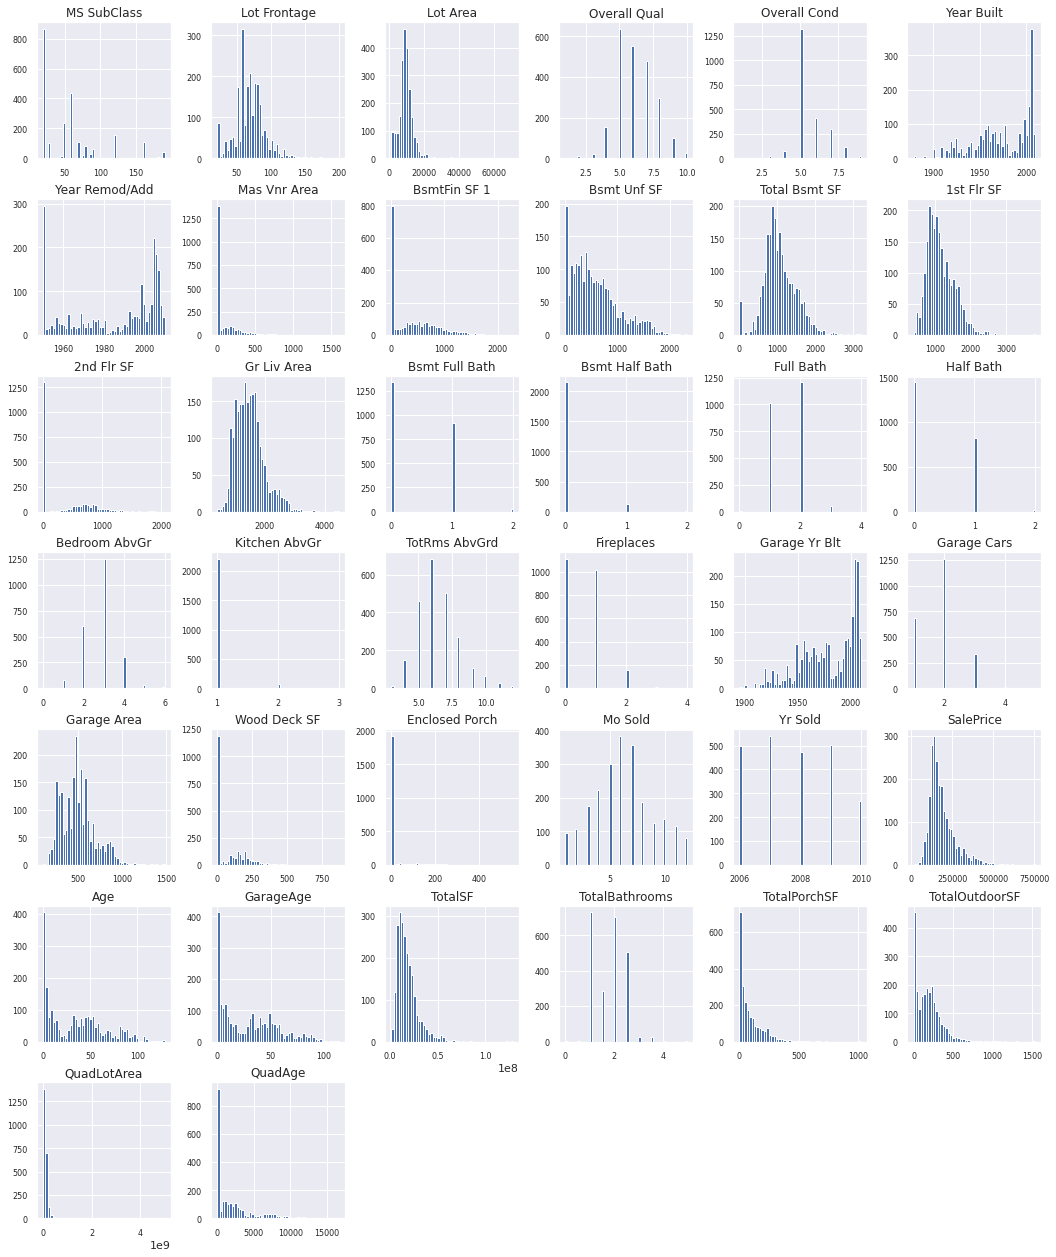

In [104]:
num_col.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

# 6. Analyse des variables catégorielles

#### Plot Percentage de chaque catégorie par variable

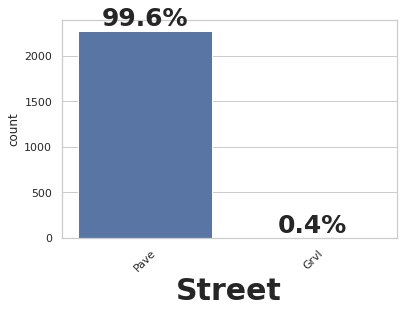

In [105]:

sns.set(style="whitegrid")

# Assuming 'Street' is the column name containing the categories in your DataFrame 'df'
sns.countplot(x='Street', data=df)

# Calculate percentages for each category
total_count = df['Street'].count()
category_counts = df['Street'].value_counts()
category_percentages = (category_counts / total_count) * 100

# Optional: Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Annotate each bar with its corresponding percentage (bigger font size)
ax = plt.gca()
for p in ax.patches:
    percentage = f"{p.get_height() / total_count * 100:.1f}%"
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=25, weight='bold')  # Adjust fontsize and weight as needed

# Set the x-axis title and make it bigger
plt.xlabel("Street", fontsize=30, weight='bold')  # Adjust fontsize and weight as needed

# Show the plot
plt.show()

#### Rechercher les colonnes dont la distribution est la plus déséquilibrée

On commence par rechercher les colonnes dont la distribution est la plus déséquilibrée

On peut distinguer:
- les colonnes complétement déséquilibrées (une valeur pèse au moins 95%) : on les supprime
- les colonnes déséquilibrées (une valeur pèse au moins 85%): s'il n'y a pas d'écart significatif entre les moyennes de saleprice pour chaque catégorie, on les supprime également.

In [106]:
highly_unbalanced_col = calculate_category_variables(cat_col, threshold_min=96, threshold_max=100)
print(highly_unbalanced_col)

['Street', 'Utilities', 'Condition 2', 'Roof Matl', 'Heating', 'Garage Cond']


In [107]:
unbalanced_col = calculate_category_variables(cat_col, threshold_min=85, threshold_max=95)
print(unbalanced_col)

['Land Contour', 'Condition 1', 'Exter Cond', 'Bsmt Cond', 'BsmtFin Type 2', 'Central Air', 'Electrical', 'Functional', 'Garage Qual', 'Paved Drive']


In [108]:
df = df.drop(highly_unbalanced_col, axis=1)
df = df.drop(unbalanced_col, axis=1)

# Analyse des corrélations

#### Calculate the correlation/strength-of-association of features in data-set with both categorical and continuous features using

In [109]:
#! pip install dython
from dython.nominal import associations
from dython.nominal import identify_nominal_columns


In [110]:
# associations dython.nominal : Calculate the correlation/strength-of-association of features in data-set with both categorical and continuous features using: * Pearson's R for continuous-continuous cases * Correlation Ratio for categorical-continuous cases * Cramer's V or Theil's U for categorical-categorical cases

# complete_correlation= associations(df,compute_only=True)

#### Search only best 15 variables correlated to SalePrice (15 + SalePrice)

In [111]:
# top_n_corr_var = complete_correlation['corr']['SalePrice'].abs().sort_values(ascending = False).to_frame().T.iloc[:, :16]



# # Votre DataFrame top_10_corr_var contenant les 10 variables les plus corrélées avec "SalePrice"
# # Créer le heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(top_n_corr_var, annot=True, fmt=".2f")
# plt.title("Heatmap des 10 variables les plus corrélées avec 'SalePrice'")
# plt.xlabel("Variables")
# plt.ylabel("SalePrice")

# plt.show()

#### Top 14 Variables (15 - SalePrice)

In [112]:
# top_n_variables = top_n_corr_var.columns[1:]
# list(top_n_variables)

In [113]:
# df_sub_selection = df.loc[:, top_n_variables]
# df_sub_selection.columns

In [114]:
# sub_correlation= associations(df_sub_selection,compute_only=True)
# mask = np.triu(np.ones_like(sub_correlation['corr'], dtype=bool))

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(15, 15))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(sub_correlation['corr'], mask=mask, cmap=cmap, center=0,
#             square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})


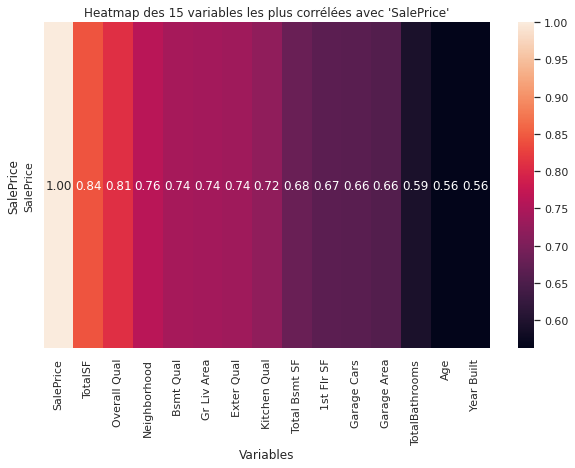

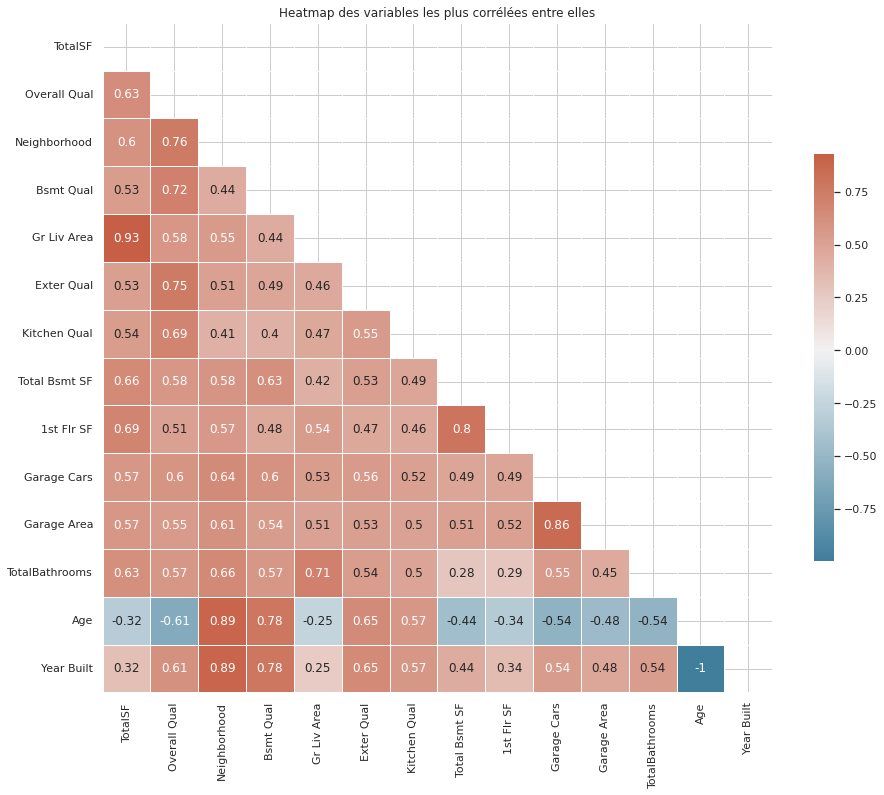

top_correlated_variables_list : 
TotalSF
Overall Qual
Neighborhood
Bsmt Qual
Gr Liv Area
Exter Qual
Kitchen Qual
Total Bsmt SF
1st Flr SF
Garage Cars
Garage Area
TotalBathrooms
Age
Year Built


In [115]:
# Call the function with your DataFrame 'df'
top_correlated_variables_list = plot_corr_heatmaps(df)
print(f"top_correlated_variables_list : ")
for i in top_correlated_variables_list:
    print(i)

df_sub_selection = df.loc[:, top_correlated_variables_list]


On voit que beaucoup de variables sont corrélées entre elles. On va s'orienter vers un modèle selectif pour pouvoir exclure les variables trop corrélées.

# 7. Préparation des données en vue du modèle

In [116]:
# print(len(df_sub_selection.columns))
# df_sub_selection.columns

In [117]:
num_selected = ["Year Built", "Total Bsmt SF", "1st Flr SF", "Gr Liv Area", "Garage Area", "SalePrice"]
cat_num = ["Overall Qual", "Full Bath", "Garage Cars"]
cat_str = ["Neighborhood", "Exter Qual", "Bsmt Qual", "Kitchen Qual", "Garage Finish"]

In [118]:
df_sub_selection.isna().sum()

TotalSF            1
Overall Qual       0
Neighborhood       0
Bsmt Qual         53
Gr Liv Area        0
Exter Qual         0
Kitchen Qual       0
Total Bsmt SF      1
1st Flr SF         0
Garage Cars        0
Garage Area        0
TotalBathrooms     0
Age                0
Year Built         0
dtype: int64

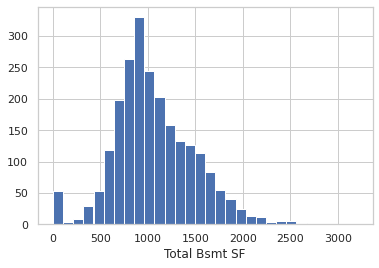

In [119]:
plt.figure()
plt.hist(x=df["Total Bsmt SF"], bins=30)
plt.xlabel("Total Bsmt SF")
plt.show()

In [120]:
df["Total Bsmt SF"].fillna(df["Total Bsmt SF"].mean(), inplace=True)

In [121]:
df["Bsmt Qual"].value_counts()

TA    997
Gd    927
Ex    232
Fa     74
Po      2
Name: Bsmt Qual, dtype: int64

In [122]:
df["Bsmt Qual"].fillna("TA", inplace=True)